### Problem Statement: Pick up the following stocks and generate forecasts accordingly Stocks:

- NASDAQ.AAPL
- NASDAQ.ADP
- NASDAQ.CBOE
- NASDAQ.CSCO
- NASDAQ.EBAY

In [1]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot 
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
from pandas import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [2]:
stocks = pd.read_csv("data_stocks.csv")
stocks.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### We will consider only the stocks that are asked in this assignment. 

In [3]:
data = stocks[['DATE','NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']]
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
data.info(), data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE         41266 non-null  int64  
 1   NASDAQ.AAPL  41266 non-null  float64
 2   NASDAQ.ADP   41266 non-null  float64
 3   NASDAQ.CBOE  41266 non-null  float64
 4   NASDAQ.CSCO  41266 non-null  float64
 5   NASDAQ.EBAY  41266 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


(None, (41266, 6))

In [5]:
data['DATE'] = pd.to_datetime(data['DATE'], unit='s')

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
data['Month'] = data['DATE'].dt.date

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY,Month
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975,2017-04-03
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950,2017-04-03
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100,2017-04-03
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350,2017-04-03
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000,2017-04-03


In [9]:
data.set_index('Month',inplace=True)
data.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
Month,,,,,,
2017-04-03,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
2017-04-03,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2017-04-03,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
2017-04-03,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
2017-04-03,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [10]:
#Let's first check for any missing values

data.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


### There are no missing values. 

#### Let's first explote Apple Stocks

In [12]:
data['NASDAQ.AAPL'].index

Index([2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03,
       2017-04-03, 2017-04-03, 2017-04-03, 2017-04-03,
       ...
       2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31,
       2017-08-31, 2017-08-31, 2017-08-31, 2017-08-31],
      dtype='object', name='Month', length=41266)

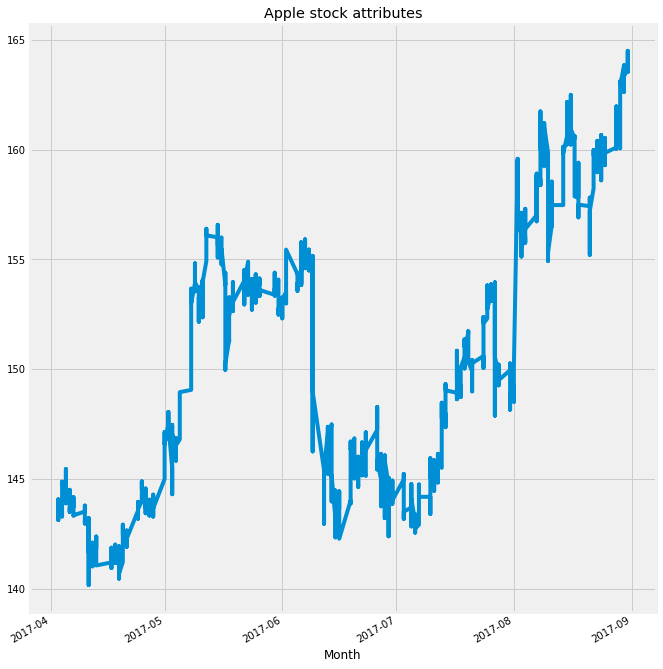

In [13]:
data['NASDAQ.AAPL'].plot(subplots=True, figsize=(10,12))
plt.title('Apple stock attributes')
plt.savefig('Apple_stocks.png')
plt.show()


ADF (Augmented Dickey-Fuller) Test

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test is:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.

If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

So let's check for stationarity:

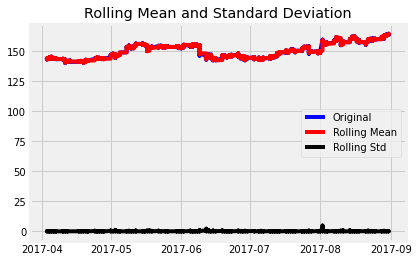

Results of dickey fuller test
Test Statistics                   -0.912853
p-value                            0.783710
No. of lags used                  31.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [14]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data['NASDAQ.AAPL'])

We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

We can also try differencing. The first difference of a time series is the series of changes from one period to the next. We can continue to take the second difference, third difference, and so on, until the data is stationary.

In [15]:
#First Difference
Apple_data = data[['NASDAQ.AAPL']]
#Apple_data.head()
Apple_data.loc[:,'First_Difference'] = Apple_data['NASDAQ.AAPL'] - Apple_data['NASDAQ.AAPL'].shift(1)

c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [16]:
Apple_data.head()

,NASDAQ.AAPL,First_Difference
Month,,
2017-04-03,143.6800,NaN
2017-04-03,143.7000,0.0200
2017-04-03,143.6901,-0.0099
2017-04-03,143.6400,-0.0501
2017-04-03,143.6600,0.0200


In [17]:
Apple_data = Apple_data.copy()
Apple_data.dropna(inplace=True)

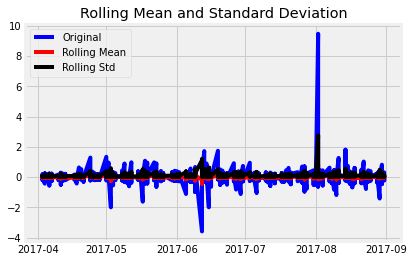

Results of dickey fuller test
Test Statistics                  -35.737741
p-value                            0.000000
No. of lags used                  30.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [18]:
test_stationarity(Apple_data['First_Difference'])

#### Test statistic is less than critical value and data has no unit root and it is stationary

### Seasonal Decomposition


c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


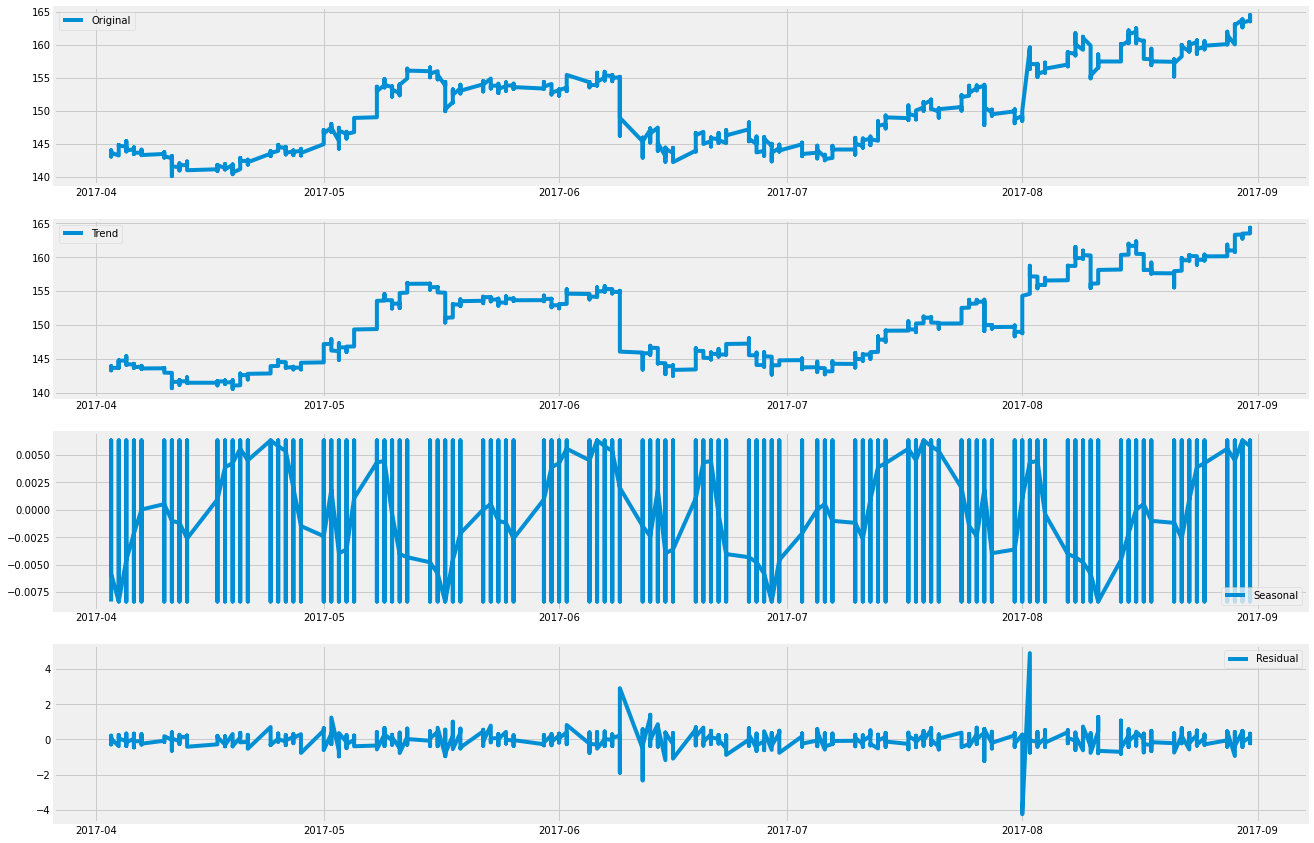

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(Apple_data['NASDAQ.AAPL'], model='multiplicative', freq = 30)
#fig = plt.figure()  
#fig = result.plot()  
#fig.set_size_inches(20, 10)

plt.figure(figsize=(20,15))
decomposition = seasonal_decompose(Apple_data['NASDAQ.AAPL'],freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(Apple_data['NASDAQ.AAPL'], label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

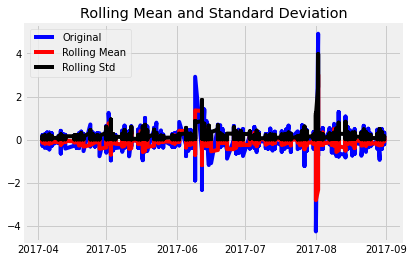

Results of dickey fuller test
Test Statistics                  -41.108766
p-value                            0.000000
No. of lags used                  55.000000
Number of observations used    41179.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [20]:
log_decompose = residual
log_decompose.dropna(inplace=True)
test_stationarity(log_decompose)

#### Data is stationary

Test statistic is lower than critical values. The rolling mean and standard deviation have small variations with time. 

<Figure size 1440x720 with 0 Axes>

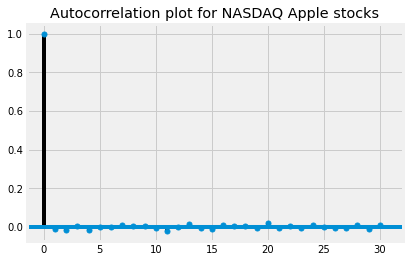

In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(20,10))
first_fig = plot_acf(Apple_data['First_Difference'], lags = 30, title = 'Autocorrelation plot for NASDAQ Apple stocks')

<Figure size 1440x720 with 0 Axes>

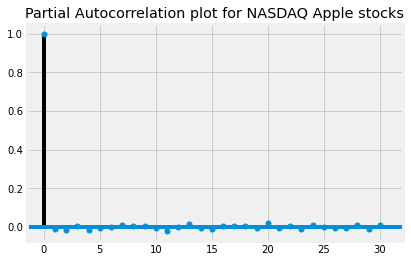

In [22]:
plt.figure(figsize=(20,10))
first_fig_pacf = plot_pacf(Apple_data['First_Difference'], lags = 30, title = 'Partial Autocorrelation plot for NASDAQ Apple stocks')

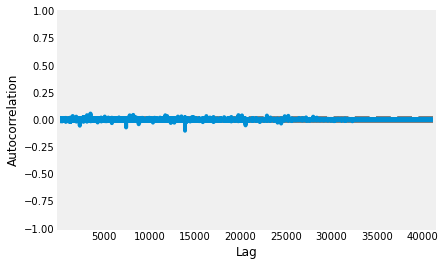

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(Apple_data['First_Difference'])

In [24]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



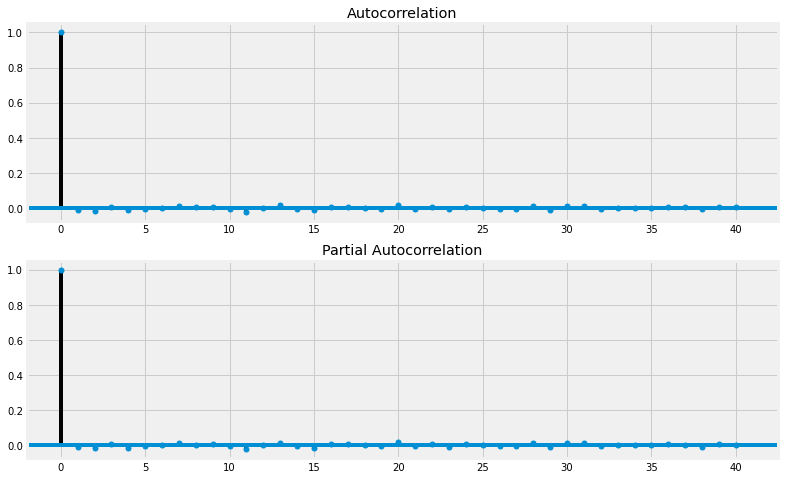

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(Apple_data['First_Difference'].iloc[30:], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(Apple_data['First_Difference'].iloc[30:],lags = 40, ax = ax2)

In [26]:
lags_acf = acf(Apple_data['First_Difference'],nlags=80)
lags_pacf = pacf(Apple_data['First_Difference'],nlags=80)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


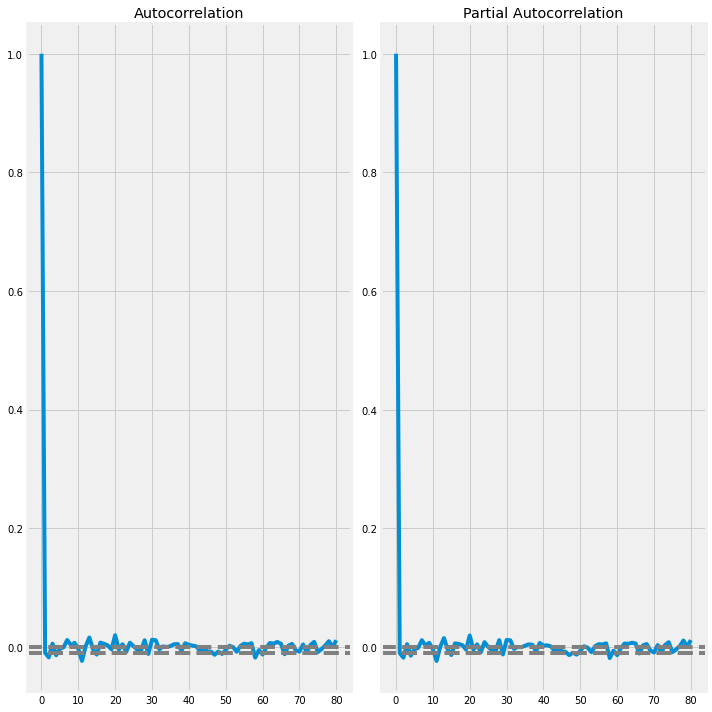

In [27]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lags_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_data['First_Difference'])), linestyle='--', color='gray')

plt.title("Autocorrelation")

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Apple_data['First_Difference'])), linestyle='--', color='gray')
plt.title("Partial Autocorrelation")
plt.tight_layout()

### Seasonal ARIMA Model

In [28]:
model = sm.tsa.statespace.SARIMAX(Apple_data['NASDAQ.AAPL'], order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Tue, 13 Oct 2020   AIC                         -49849.104
Time:                                    10:10:59   BIC                         -49840.476
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.706      0.000       0.017       0.017
===================================================================================
Ljung-Box (Q):                    10611.64   Jarque-Bera (JB):        3462262317.71
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                            -2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                      1422.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

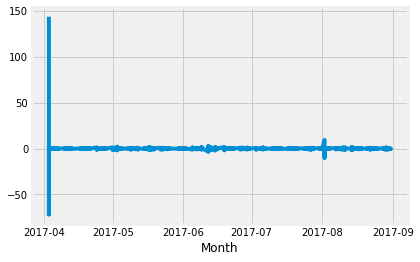

In [29]:
results.resid.plot()

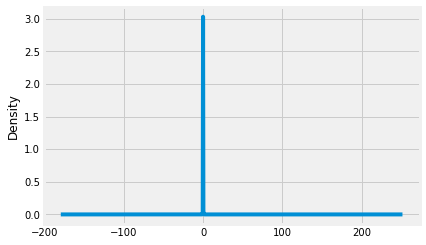

In [30]:
results.resid.plot(kind='kde')

In [31]:
Apple_data = Apple_data.copy()
Apple_data['Forecast'] = results.predict()

In [32]:
Apple_data.head()

,NASDAQ.AAPL,First_Difference,Forecast
Month,,,
2017-04-03,143.7000,0.0200,0.0000
2017-04-03,143.6901,-0.0099,143.7000
2017-04-03,143.6400,-0.0501,143.6901
2017-04-03,143.6600,0.0200,143.6400
2017-04-03,143.7800,0.1200,143.6600


### Prediction of future values

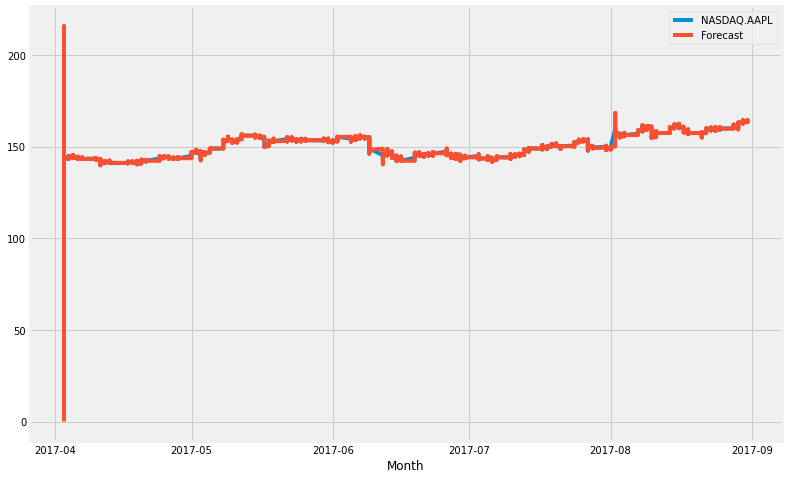

In [33]:
Apple_data[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

In [34]:
results.forecast(steps=20)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
41275    163.630
41276    163.730
41277    163.710
41278    163.685
41279    163.660
41280    163.560
41281    163.690
41282    163.700
41283    163.640
41284    163.610
dtype: float64

In [35]:
results.predict(start=41264,end=41284)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    163.930
41265    163.960
41266    163.935
41267    163.910
41268    163.810
41269    163.940
41270    163.950
41271    163.890
41272    163.860
41273    163.870
41274    163.760
41275    163.630
41276    163.730
41277    163.710
41278    163.685
41279    163.660
41280    163.560
41281    163.690
41282    163.700
41283    163.640
41284    163.610
dtype: float64

In [36]:
#### Accuracy of the forecast using Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Squared Error NASDAQ.AAPL: ', mean_squared_error(Apple_data['NASDAQ.AAPL'],Apple_data['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL: ', mean_absolute_error(Apple_data['NASDAQ.AAPL'],Apple_data['Forecast']))
rmse = math.sqrt(mean_squared_error(Apple_data['NASDAQ.AAPL'],Apple_data['Forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(Apple_data['Forecast'] - Apple_data['NASDAQ.AAPL'])/np.abs(Apple_data['NASDAQ.AAPL']))
print('MAPE: '+str(mape))

Mean Squared Error NASDAQ.AAPL:  0.642640821227639
Mean Absolute Error NASDAQ.AAPL:  0.07550728221185968
RMSE: 0.8016488141497117
MAPE: 0.0005029241331258143


### ADP, CBOE, CSCO, EBAY stocks price prediction

Since there are no missing values in any of the stocks values, let's proceed with the visualization.

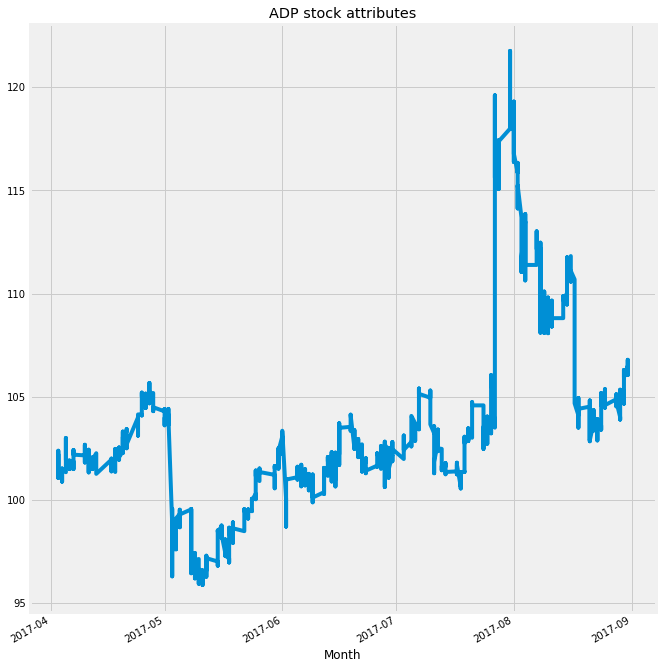

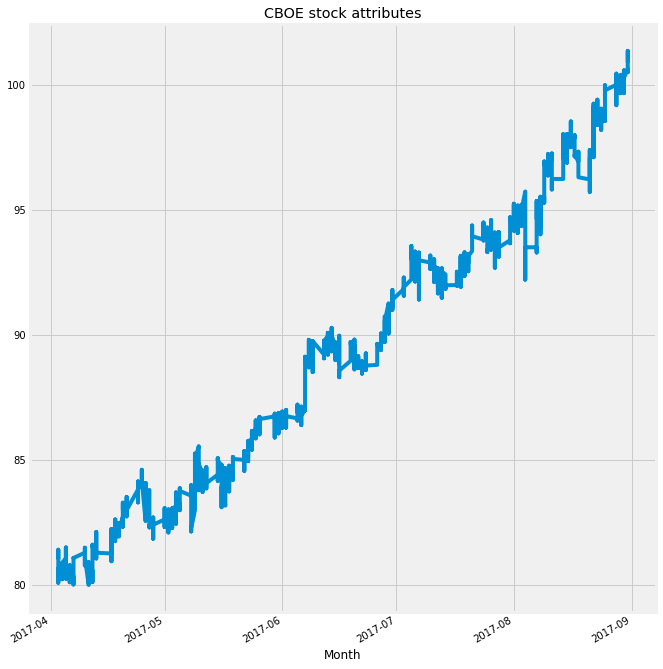

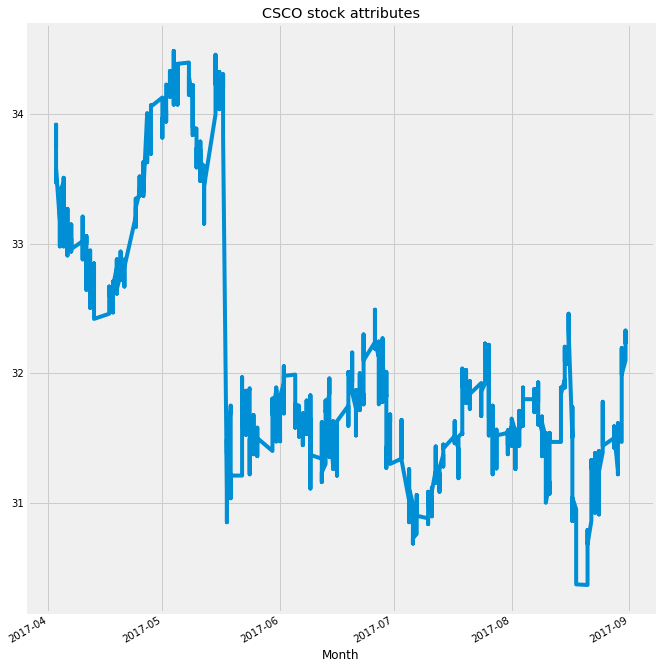

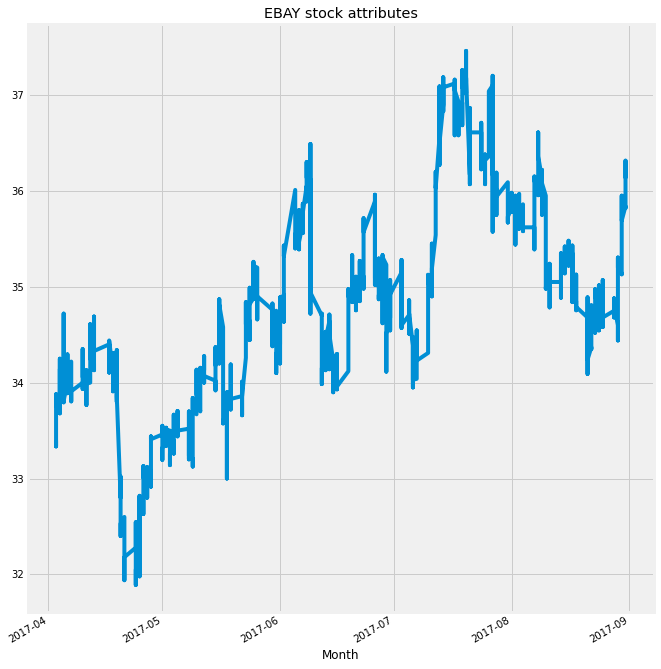

In [37]:
data['NASDAQ.ADP'].plot(subplots=True, figsize=(10,12))
plt.title('ADP stock attributes')
plt.savefig('ADP_stocks.png')
plt.show()

data['NASDAQ.CBOE'].plot(subplots=True, figsize=(10,12))
plt.title('CBOE stock attributes')
plt.savefig('CBOE_stocks.png')
plt.show()

data['NASDAQ.CSCO'].plot(subplots=True, figsize=(10,12))
plt.title('CSCO stock attributes')
plt.savefig('CSCO_stocks.png')
plt.show()

data['NASDAQ.EBAY'].plot(subplots=True, figsize=(10,12))
plt.title('EBAY stock attributes')
plt.savefig('EBAY_stocks.png')
plt.show()

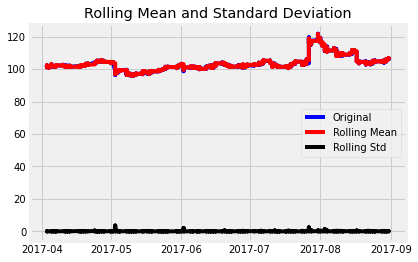

Results of dickey fuller test
Test Statistics                   -1.651322
p-value                            0.456351
No. of lags used                   0.000000
Number of observations used    41265.000000
critical value (1%)               -3.430508
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64
ADP None


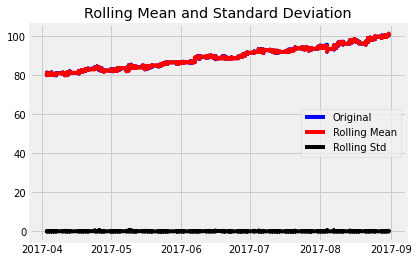

Results of dickey fuller test
Test Statistics                    0.166339
p-value                            0.970309
No. of lags used                  27.000000
Number of observations used    41238.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64
CBOE None


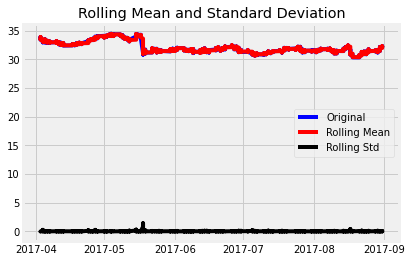

Results of dickey fuller test
Test Statistics                   -2.395555
p-value                            0.142995
No. of lags used                  47.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64
CSCO None


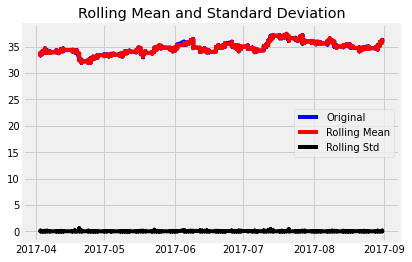

Results of dickey fuller test
Test Statistics                   -1.875762
p-value                            0.343548
No. of lags used                  47.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64
EBAY None


In [38]:
print("ADP",test_stationarity(data['NASDAQ.ADP']))
print("CBOE",test_stationarity(data['NASDAQ.CBOE']))
print("CSCO",test_stationarity(data['NASDAQ.CSCO']))    
print("EBAY",test_stationarity(data['NASDAQ.EBAY']))

All the stocks have a unit root, and critical values for all is greater than the test-statistics, indicating the data is non-stationary. 

Let's start with making the data stationary for each of the stocks. 

### ADP Stocks

In [40]:
ADP_data = data[['NASDAQ.ADP']] 
ADP_data['First_Difference'] =  ADP_data['NASDAQ.ADP'] - ADP_data['NASDAQ.ADP'].shift(1)
ADP_data.head()

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,NASDAQ.ADP,First_Difference
Month,,
2017-04-03,102.2300,NaN
2017-04-03,102.1400,-0.0900
2017-04-03,102.2125,0.0725
2017-04-03,102.1400,-0.0725
2017-04-03,102.0600,-0.0800


In [41]:
ADP_data = ADP_data.copy()
ADP_data.dropna(inplace=True)

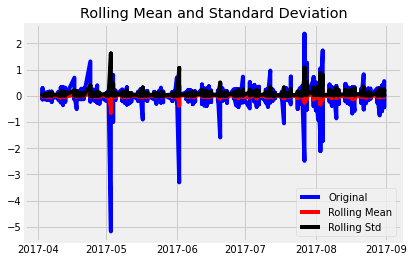

Results of dickey fuller test
Test Statistics                  -31.055662
p-value                            0.000000
No. of lags used                  38.000000
Number of observations used    41226.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [42]:
test_stationarity(ADP_data['First_Difference'])

#### Test statistic is less than critical value and data has no unit root and it is stationary


### Seasonal Decomposition

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


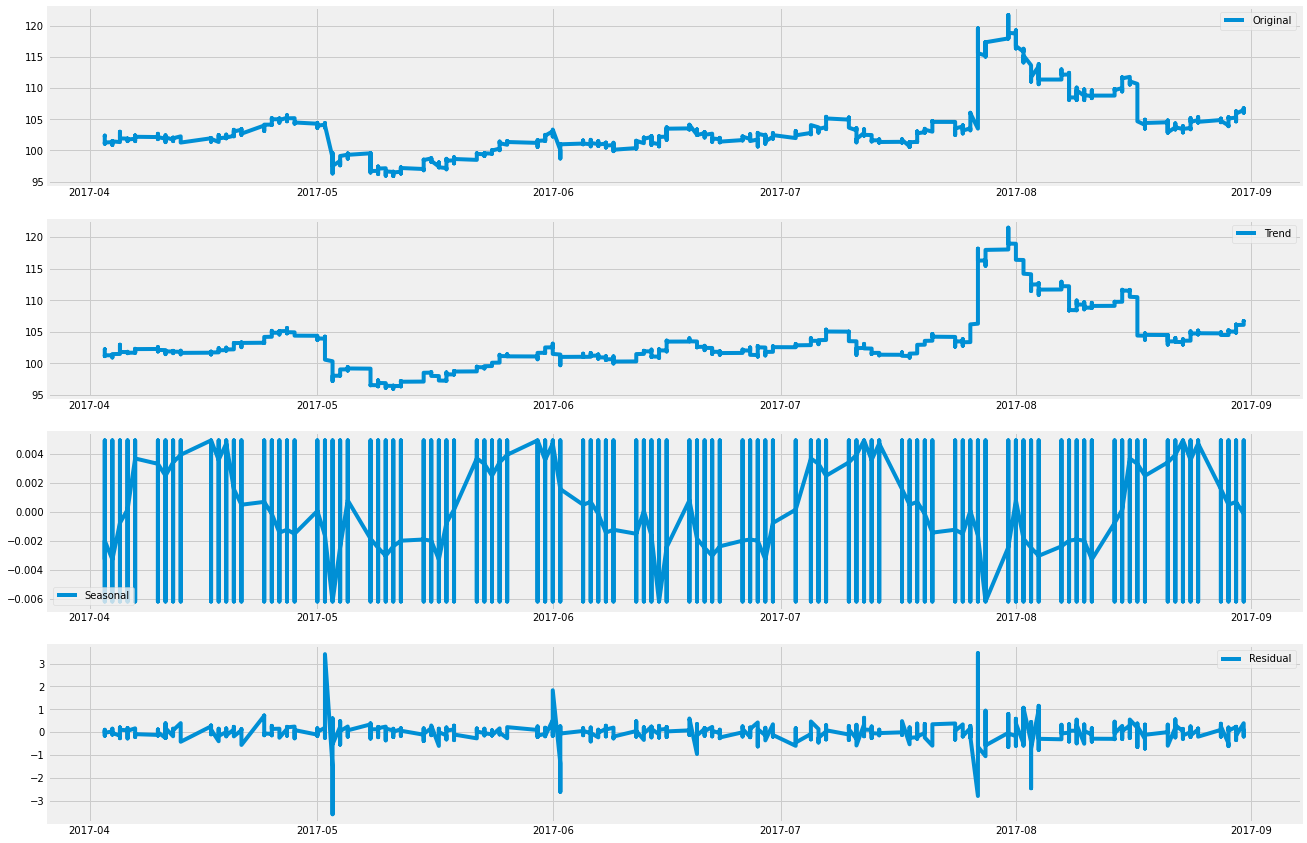

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(Apple_data['NASDAQ.AAPL'], model='multiplicative', freq = 30)
#fig = plt.figure()  
#fig = result.plot()  
#fig.set_size_inches(20, 10)

plt.figure(figsize=(20,15))
decomposition = seasonal_decompose(ADP_data['NASDAQ.ADP'],freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ADP_data['NASDAQ.ADP'], label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

<Figure size 1440x720 with 0 Axes>

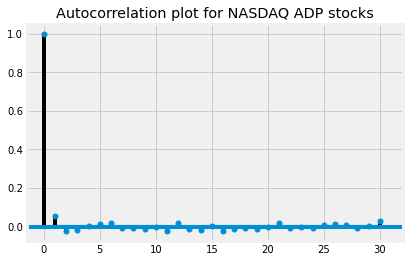

In [45]:
plt.figure(figsize=(20,10))
first_fig = plot_acf(ADP_data['First_Difference'], lags = 30, title = 'Autocorrelation plot for NASDAQ ADP stocks')

<Figure size 1440x720 with 0 Axes>

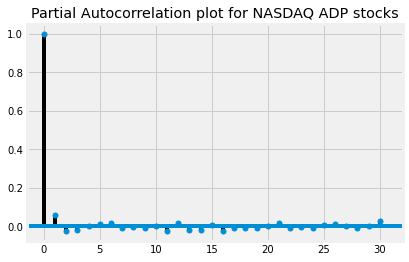

In [46]:
plt.figure(figsize=(20,10))
first_fig_pacf = plot_pacf(ADP_data['First_Difference'], lags = 30, title = 'Partial Autocorrelation plot for NASDAQ ADP stocks')

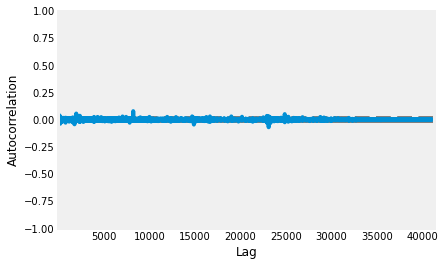

In [47]:
autocorrelation_plot(ADP_data['First_Difference'])

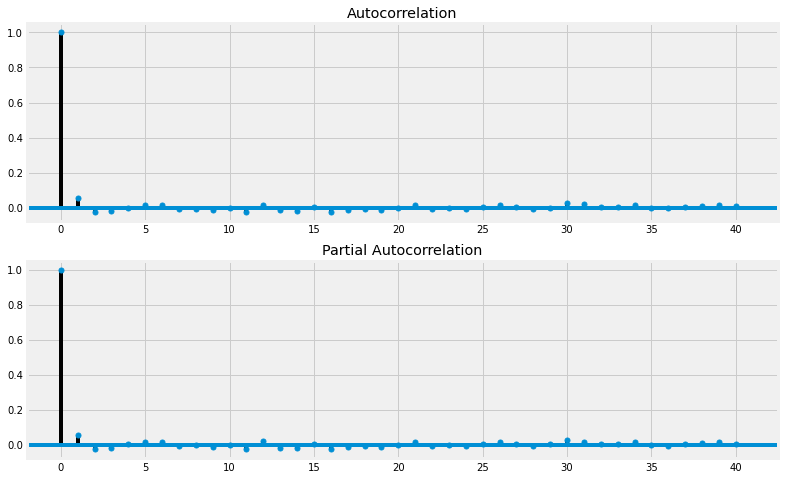

In [48]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ADP_data['First_Difference'].iloc[30:], lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ADP_data['First_Difference'].iloc[30:],lags = 40, ax = ax2)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


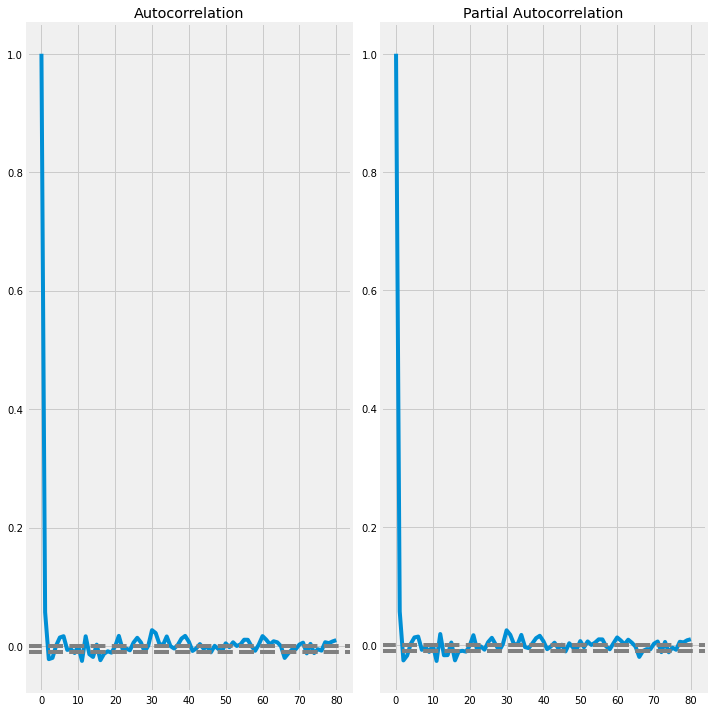

In [49]:
lags_acf = acf(ADP_data['First_Difference'],nlags=80)
lags_pacf = pacf(ADP_data['First_Difference'],nlags=80)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lags_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_data['First_Difference'])), linestyle='--', color='gray')

plt.title("Autocorrelation")

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_data['First_Difference'])), linestyle='--', color='gray')
plt.title("Partial Autocorrelation")
plt.tight_layout()

### Seasonal ARIMA Model

In [52]:
model = sm.tsa.statespace.SARIMAX(ADP_data['NASDAQ.ADP'], order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Tue, 13 Oct 2020   AIC                         -69464.026
Time:                                    10:19:20   BIC                         -69455.399
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.759      0.000       0.011       0.011
===================================================================================
Ljung-Box (Q):                    10628.96   Jarque-Bera (JB):         275266215.34
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                       403.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

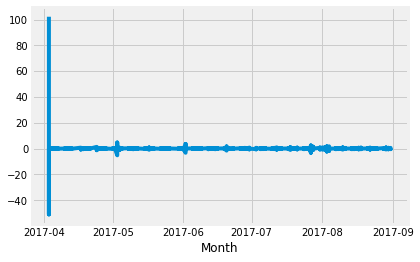

In [53]:
results.resid.plot()

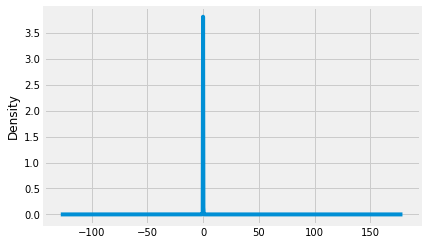

In [54]:
results.resid.plot(kind='kde')

In [56]:
ADP_data = ADP_data.copy()
ADP_data['Forecast'] = results.predict()
ADP_data.head()

,NASDAQ.ADP,First_Difference,Forecast
Month,,,
2017-04-03,102.1400,-0.0900,0.0000
2017-04-03,102.2125,0.0725,102.1400
2017-04-03,102.1400,-0.0725,102.2125
2017-04-03,102.0600,-0.0800,102.1400
2017-04-03,102.0400,-0.0200,102.0600


#### Prediction of future values

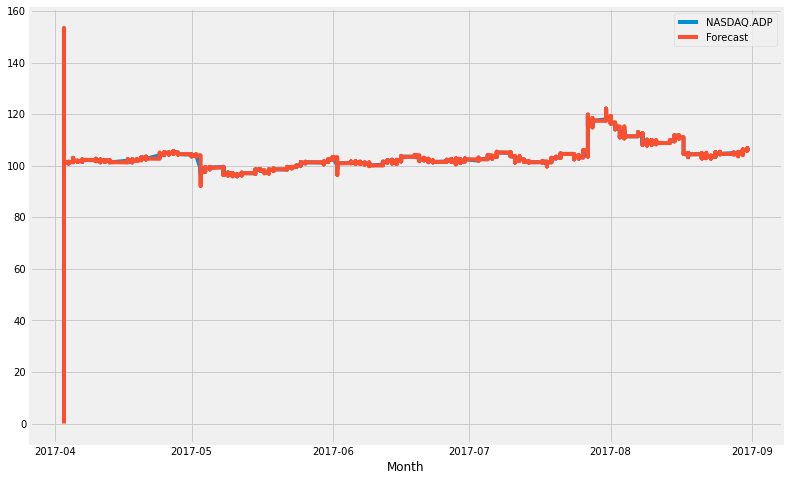

In [57]:
ADP_data[['NASDAQ.ADP','Forecast']].plot(figsize=(12,8))

In [58]:
results.forecast(steps=20)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
41275    106.220
41276    106.290
41277    106.290
41278    106.290
41279    106.260
41280    106.200
41281    106.260
41282    106.240
41283    106.270
41284    106.205
dtype: float64

In [59]:
results.predict(start=41264,end=41284)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    106.430
41265    106.470
41266    106.470
41267    106.440
41268    106.380
41269    106.440
41270    106.420
41271    106.450
41272    106.385
41273    106.410
41274    106.340
41275    106.220
41276    106.290
41277    106.290
41278    106.290
41279    106.260
41280    106.200
41281    106.260
41282    106.240
41283    106.270
41284    106.205
dtype: float64

In [61]:
#### Accuracy of the forecast using Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Squared Error NASDAQ.ADP: ', mean_squared_error(ADP_data['NASDAQ.ADP'],ADP_data['Forecast']))
print('Mean Absolute Error NASDAQ.ADP: ', mean_absolute_error(ADP_data['NASDAQ.ADP'],ADP_data['Forecast']))
rmse = math.sqrt(mean_squared_error(ADP_data['NASDAQ.ADP'],ADP_data['Forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(ADP_data['Forecast'] - ADP_data['NASDAQ.ADP'])/np.abs(ADP_data['NASDAQ.ADP']))
print('MAPE: '+str(mape))

Mean Squared Error NASDAQ.ADP:  0.3267938112781581
Mean Absolute Error NASDAQ.ADP:  0.05339673805219505
RMSE: 0.5716588241933803
MAPE: 0.0005097298497847396


### CBOE Stocks Prediction

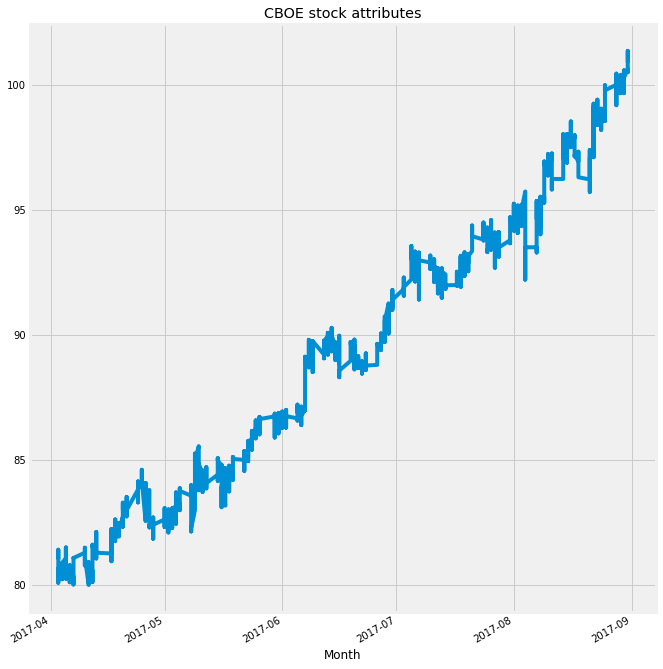

In [63]:
data['NASDAQ.CBOE'].plot(subplots=True, figsize=(10,12))
plt.title('CBOE stock attributes')
plt.savefig('CBOE_stocks.png')
plt.show()


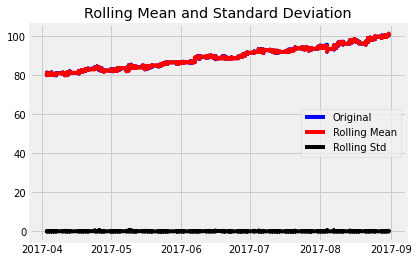

Results of dickey fuller test
Test Statistics                   -0.227104
p-value                            0.935213
No. of lags used                   0.000000
Number of observations used    41265.000000
critical value (1%)               -3.430508
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [64]:
test_stationarity(data['NASDAQ.CBOE'])

In [67]:
#First Difference
CBOE_data = data[['NASDAQ.CBOE']]
CBOE_data.loc[:,'First_Difference'] = CBOE_data['NASDAQ.CBOE'] - CBOE_data['NASDAQ.CBOE'].shift(1)

c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [68]:
CBOE_data.head()

,NASDAQ.CBOE,First_Difference
Month,,
2017-04-03,81.03,NaN
2017-04-03,81.21,0.18
2017-04-03,81.21,0.00
2017-04-03,81.13,-0.08
2017-04-03,81.12,-0.01


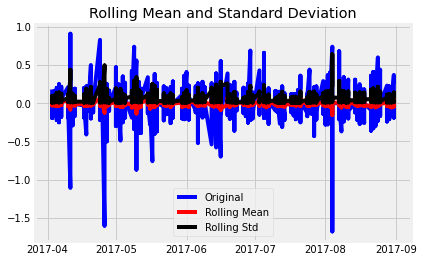

Results of dickey fuller test
Test Statistics                  -41.642094
p-value                            0.000000
No. of lags used                  26.000000
Number of observations used    41238.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [69]:
CBOE_data = CBOE_data.copy()
CBOE_data.dropna(inplace=True)

test_stationarity(CBOE_data['First_Difference'])

#### Test statistic is less than critical value and data has no unit root and it is stationary

### Seasonal Decomposition

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  if __name__ == '__main__':


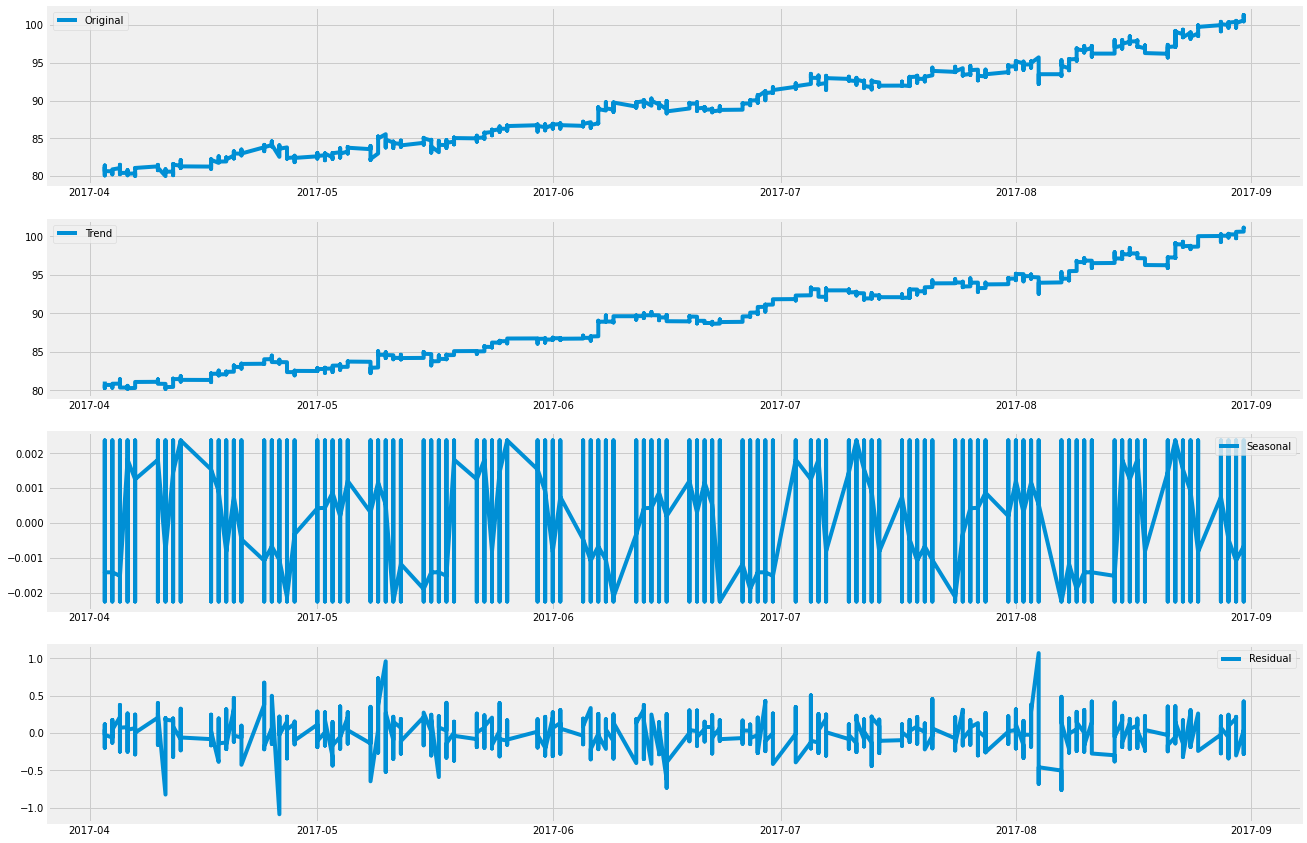

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

#result = seasonal_decompose(Apple_data['NASDAQ.AAPL'], model='multiplicative', freq = 30)
#fig = plt.figure()  
#fig = result.plot()  
#fig.set_size_inches(20, 10)

plt.figure(figsize=(20,15))
decomposition = seasonal_decompose(CBOE_data['NASDAQ.CBOE'],freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(CBOE_data['NASDAQ.CBOE'], label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

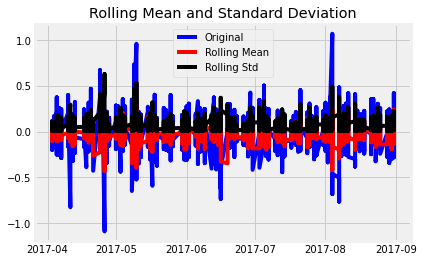

Results of dickey fuller test
Test Statistics                  -75.791150
p-value                            0.000000
No. of lags used                   0.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [72]:
log_decompose = residual
log_decompose.dropna(inplace=True)
test_stationarity(log_decompose)

Data is stationary
Test statistic is lower than critical values. The rolling mean and standard deviation have small variations with time.

<Figure size 1440x720 with 0 Axes>

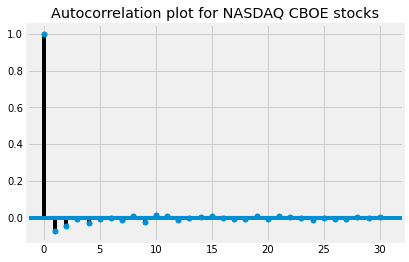

In [73]:
plt.figure(figsize=(20,10))
first_fig = plot_acf(CBOE_data['First_Difference'], lags = 30, title = 'Autocorrelation plot for NASDAQ CBOE stocks')

<Figure size 1440x720 with 0 Axes>

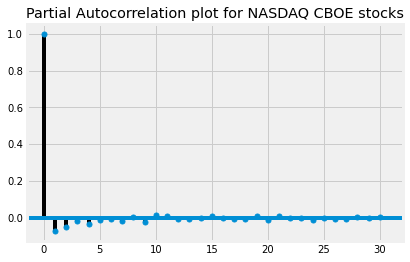

In [74]:
plt.figure(figsize=(20,10))
first_fig_pacf = plot_pacf(CBOE_data['First_Difference'], lags = 30, title = 'Partial Autocorrelation plot for NASDAQ CBOE stocks')

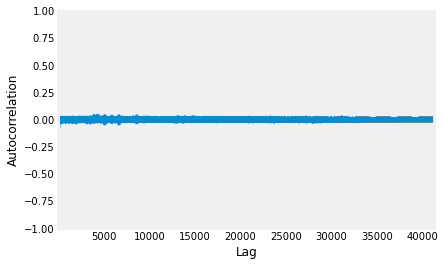

In [75]:
autocorrelation_plot(CBOE_data['First_Difference'])

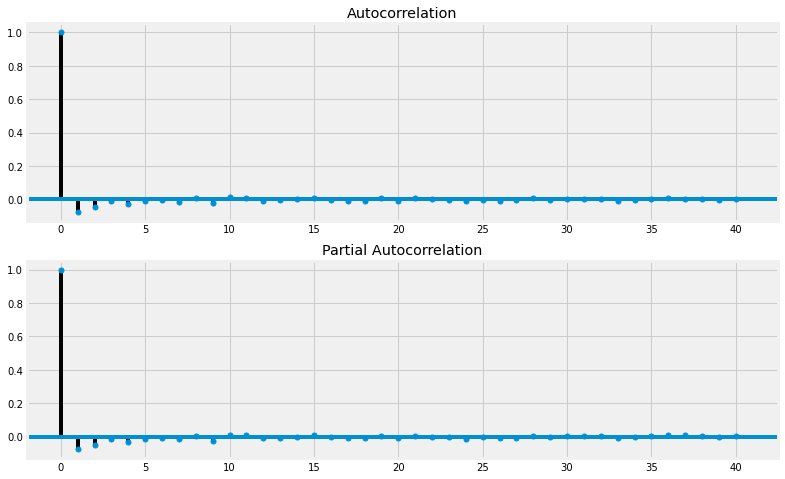

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CBOE_data['First_Difference'].iloc[30:], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CBOE_data['First_Difference'].iloc[30:],lags = 40, ax = ax2)

In [77]:
lags_acf = acf(CBOE_data['First_Difference'],nlags=80)
lags_pacf = pacf(CBOE_data['First_Difference'],nlags=80)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


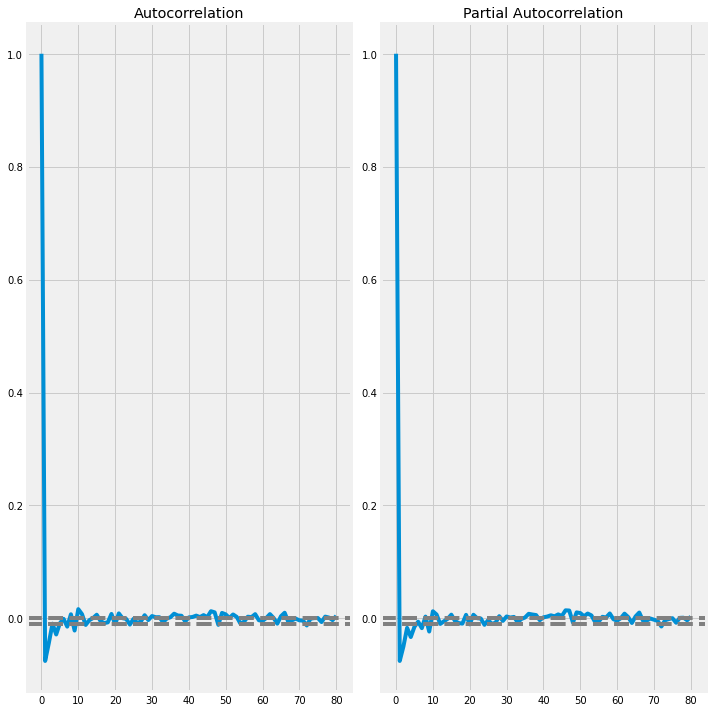

In [78]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lags_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_data['First_Difference'])), linestyle='--', color='gray')

plt.title("Autocorrelation")

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_data['First_Difference'])), linestyle='--', color='gray')
plt.title("Partial Autocorrelation")
plt.tight_layout()

### Seasonal ARIMA Model

In [79]:
model = sm.tsa.statespace.SARIMAX(CBOE_data['NASDAQ.CBOE'], order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Tue, 13 Oct 2020   AIC                        -106826.184
Time:                                    10:35:00   BIC                        -106817.557
Sample:                                         0   HQIC                       -106823.457
                                          - 41265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.305      0.000       0.004       0.004
===================================================================================
Ljung-Box (Q):                    11084.06   Jarque-Bera (JB):           7011759.81
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        66.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

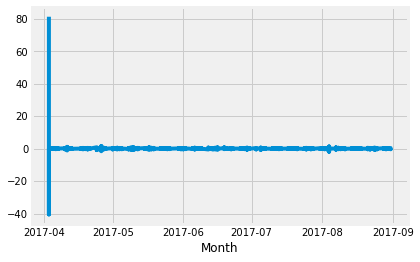

In [80]:
results.resid.plot()

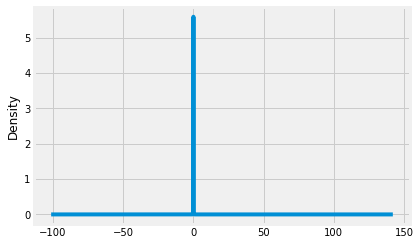

In [81]:
results.resid.plot(kind='kde')

In [88]:
CBOE_data = CBOE_data.copy()
CBOE_data['Forecast'] = results.predict()

### Prediction of future values


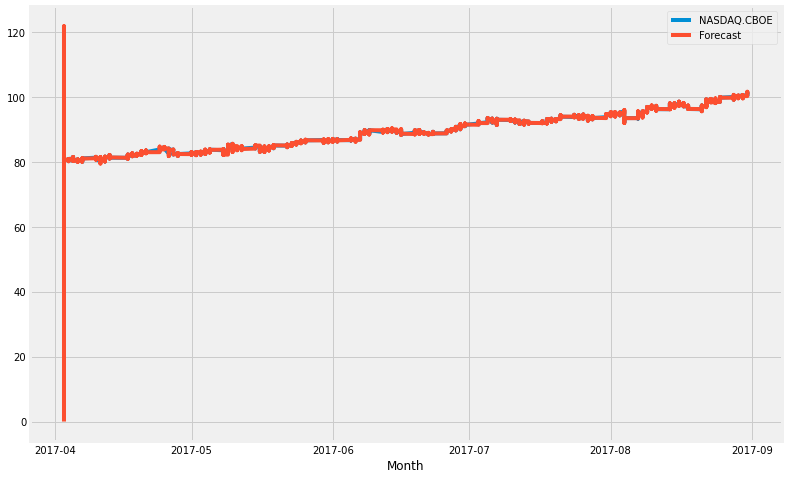

In [89]:
CBOE_data[['NASDAQ.CBOE','Forecast']].plot(figsize=(12,8))

In [90]:
results.forecast(steps=20)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
41275    100.8200
41276    100.8800
41277    100.8300
41278    100.8800
41279    100.9000
41280    100.8600
41281    100.8700
41282    100.8600
41283    100.8699
41284    100.8700
dtype: float64

In [91]:
results.predict(start=41264,end=41284)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    100.8200
41265    100.8400
41266    100.8900
41267    100.9100
41268    100.8700
41269    100.8800
41270    100.8700
41271    100.8799
41272    100.8800
41273    100.8700
41274    100.8500
41275    100.8200
41276    100.8800
41277    100.8300
41278    100.8800
41279    100.9000
41280    100.8600
41281    100.8700
41282    100.8600
41283    100.8699
41284    100.8700
dtype: float64

In [92]:
#### Accuracy of the forecast using Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Squared Error NASDAQ.CBOE: ', mean_squared_error(CBOE_data['NASDAQ.CBOE'], CBOE_data['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE: ', mean_absolute_error(CBOE_data['NASDAQ.CBOE'], CBOE_data['Forecast']))
rmse = math.sqrt(mean_squared_error(CBOE_data['NASDAQ.CBOE'],CBOE_data['Forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(CBOE_data['Forecast'] - CBOE_data['NASDAQ.CBOE'])/np.abs(CBOE_data['NASDAQ.CBOE']))
print('MAPE: '+str(mape))

Mean Squared Error NASDAQ.CBOE:  0.20399400191411893
Mean Absolute Error NASDAQ.CBOE:  0.04356630532976979
RMSE: 0.4516569515839637
MAPE: 0.0004927061019450358


### CSCO Stocks Prediction

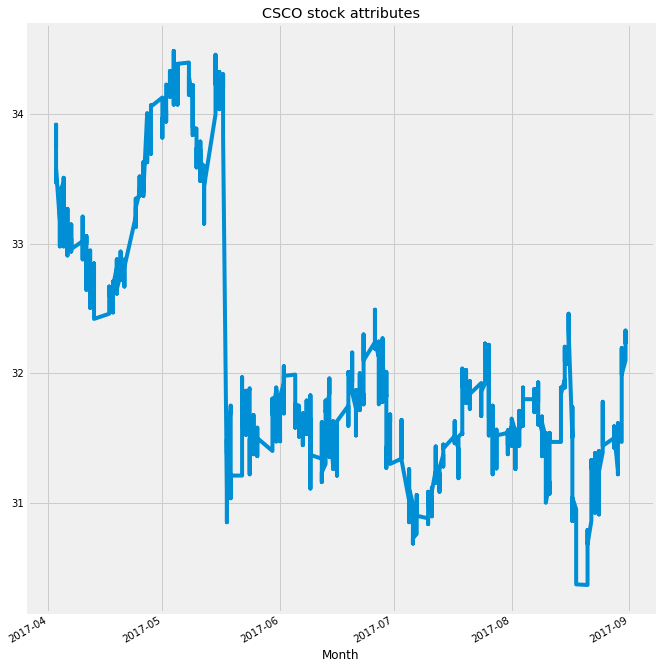

In [93]:
data['NASDAQ.CSCO'].plot(subplots=True, figsize=(10,12))
plt.title('CSCO stock attributes')
plt.savefig('CSCO_stocks.png')
plt.show()


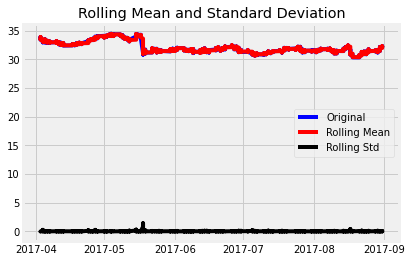

Results of dickey fuller test
Test Statistics                   -2.500441
p-value                            0.115367
No. of lags used                   0.000000
Number of observations used    41265.000000
critical value (1%)               -3.430508
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [94]:
test_stationarity(data['NASDAQ.CSCO'])

In [95]:
#First Difference
CSCO_data = data[['NASDAQ.CSCO']]
CSCO_data.loc[:,'First_Difference'] = CSCO_data['NASDAQ.CSCO'] - CSCO_data['NASDAQ.CSCO'].shift(1)

c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [96]:
CSCO_data.head()

,NASDAQ.CSCO,First_Difference
Month,,
2017-04-03,33.7400,NaN
2017-04-03,33.8800,0.1400
2017-04-03,33.9000,0.0200
2017-04-03,33.8499,-0.0501
2017-04-03,33.8400,-0.0099


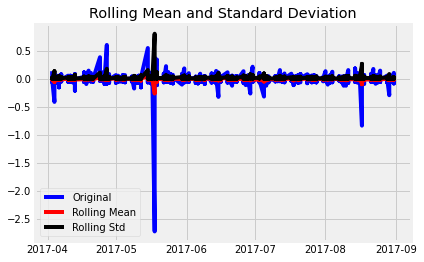

Results of dickey fuller test
Test Statistics                  -30.356683
p-value                            0.000000
No. of lags used                  46.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [97]:
CSCO_data = CSCO_data.copy()
CSCO_data.dropna(inplace=True)
test_stationarity(CSCO_data['First_Difference'])

#### Test statistic is less than critical value and data has no unit root and it is stationary

### Seasonal Decomposition

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


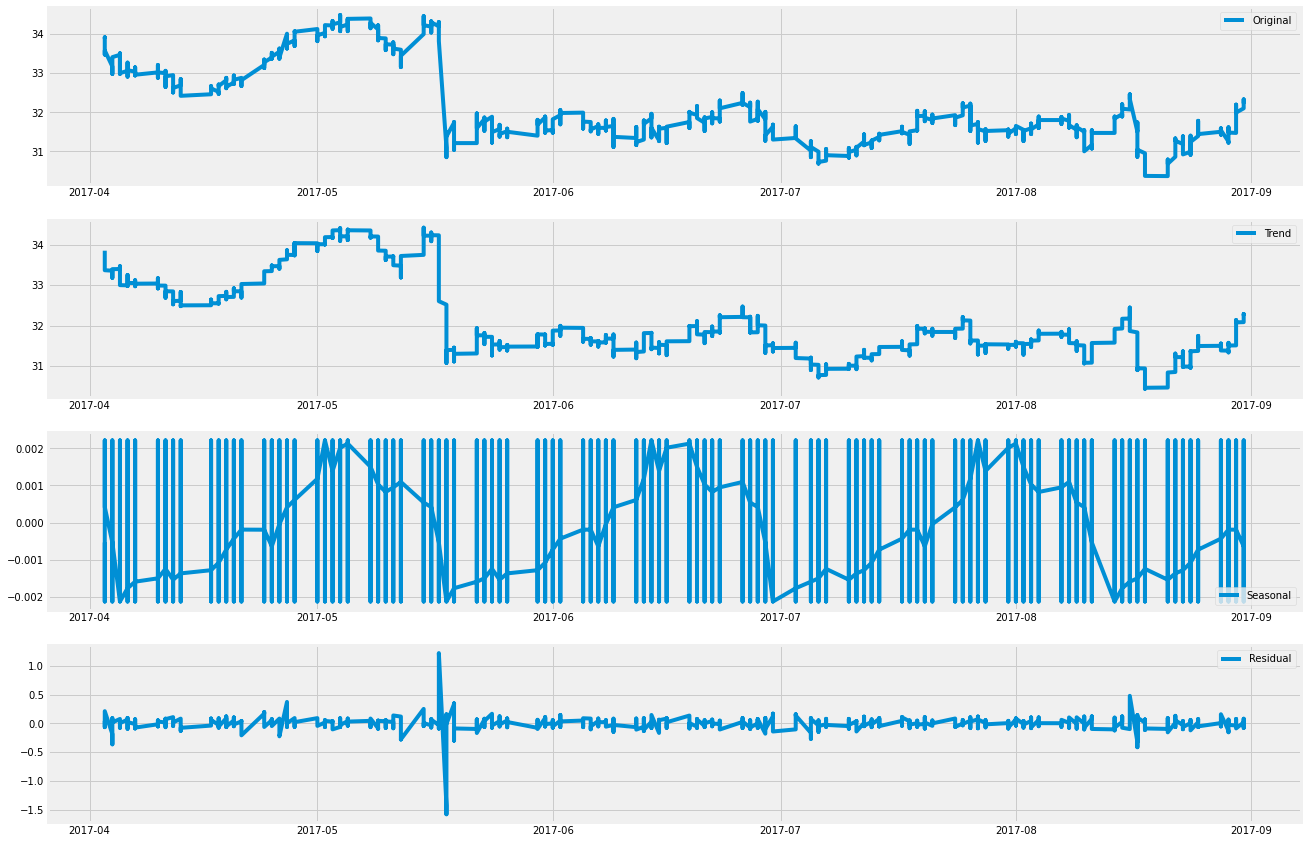

In [99]:
plt.figure(figsize=(20,15))
decomposition = seasonal_decompose(CSCO_data['NASDAQ.CSCO'],freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(CSCO_data['NASDAQ.CSCO'], label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

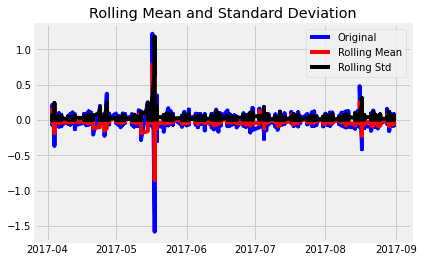

Results of dickey fuller test
Test Statistics                  -69.008621
p-value                            0.000000
No. of lags used                   0.000000
Number of observations used    41234.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [100]:
log_decompose = residual
log_decompose.dropna(inplace=True)
test_stationarity(log_decompose)

Data is stationary
Test statistic is lower than critical values. The rolling mean and standard deviation have small variations with time.

<Figure size 1440x720 with 0 Axes>

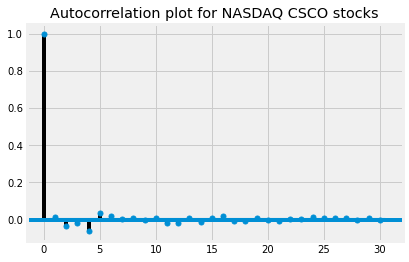

In [101]:
plt.figure(figsize=(20,10))
first_fig = plot_acf(CSCO_data['First_Difference'], lags = 30, title = 'Autocorrelation plot for NASDAQ CSCO stocks')

<Figure size 1440x720 with 0 Axes>

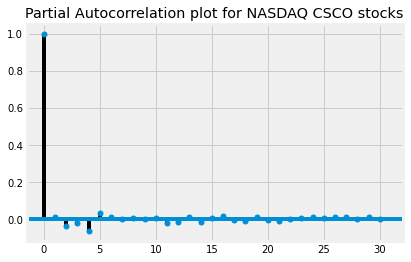

In [102]:
plt.figure(figsize=(20,10))
first_fig_pacf = plot_pacf(CSCO_data['First_Difference'], lags = 30, title = 'Partial Autocorrelation plot for NASDAQ CSCO stocks')

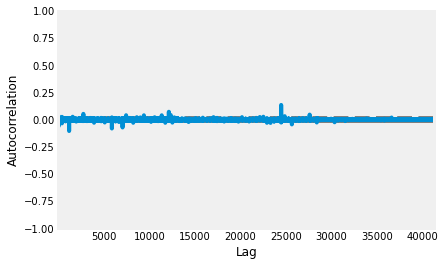

In [103]:
autocorrelation_plot(CSCO_data['First_Difference'])

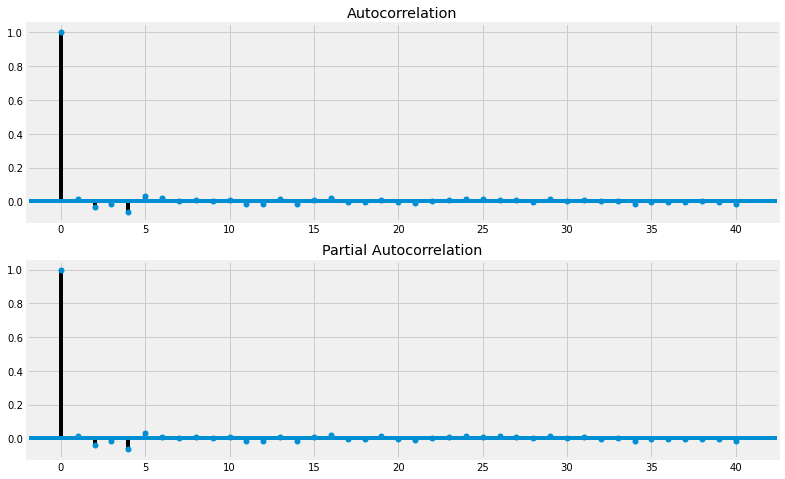

In [104]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(CSCO_data['First_Difference'].iloc[30:], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(CSCO_data['First_Difference'].iloc[30:],lags = 40, ax = ax2)

In [105]:
lags_acf = acf(CSCO_data['First_Difference'],nlags=80)
lags_pacf = pacf(CSCO_data['First_Difference'],nlags=80)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


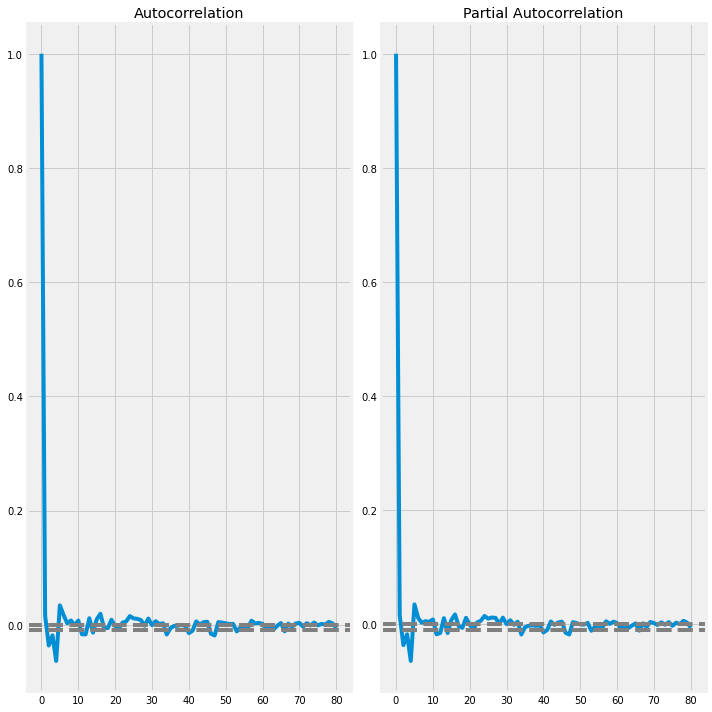

In [106]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lags_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_data['First_Difference'])), linestyle='--', color='gray')

plt.title("Autocorrelation")

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_data['First_Difference'])), linestyle='--', color='gray')
plt.title("Partial Autocorrelation")
plt.tight_layout()

In [107]:
model = sm.tsa.statespace.SARIMAX(CSCO_data['NASDAQ.CSCO'], order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85502.595
Date:                            Tue, 13 Oct 2020   AIC                        -171003.190
Time:                                    10:53:23   BIC                        -170994.563
Sample:                                         0   HQIC                       -171000.463
                                          - 41265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.838      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                    11736.64   Jarque-Bera (JB):       21073382342.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.30   Skew:                             2.67
Prob(H) (two-sided):                  0.00   Kurtosis:                      3504.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

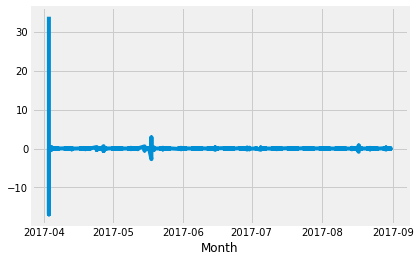

In [108]:
results.resid.plot()

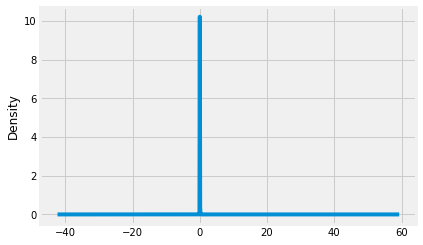

In [109]:
results.resid.plot(kind='kde')

In [111]:
CSCO_data = CSCO_data.copy()
CSCO_data['Forecast'] = results.predict()
CSCO_data.head()

,NASDAQ.CSCO,First_Difference,Forecast
Month,,,
2017-04-03,33.8800,0.1400,0.0000
2017-04-03,33.9000,0.0200,33.8800
2017-04-03,33.8499,-0.0501,33.9000
2017-04-03,33.8400,-0.0099,33.8499
2017-04-03,33.8800,0.0400,33.8400


### Prediction of future values

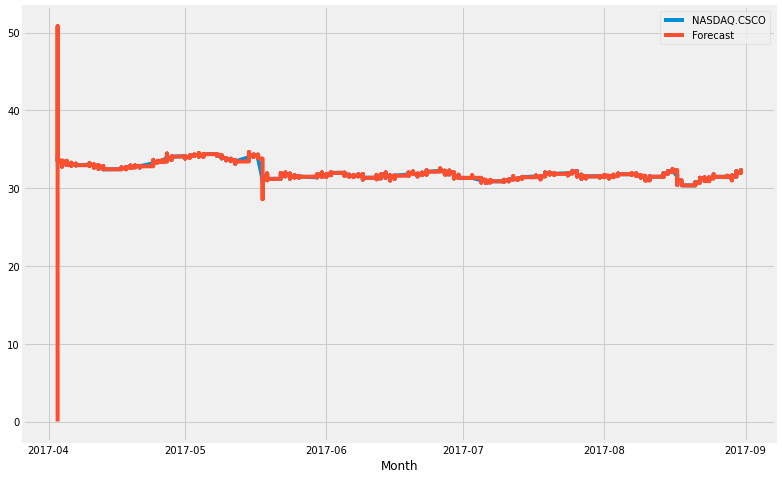

In [113]:
CSCO_data[['NASDAQ.CSCO','Forecast']].plot(figsize=(12,8))

In [114]:
results.forecast(steps=20)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
41275    32.175
41276    32.205
41277    32.205
41278    32.170
41279    32.150
41280    32.130
41281    32.160
41282    32.150
41283    32.130
41284    32.145
dtype: float64

In [115]:
results.predict(start=41264,end=41284)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    32.195
41265    32.225
41266    32.190
41267    32.170
41268    32.150
41269    32.180
41270    32.170
41271    32.150
41272    32.165
41273    32.180
41274    32.180
41275    32.175
41276    32.205
41277    32.205
41278    32.170
41279    32.150
41280    32.130
41281    32.160
41282    32.150
41283    32.130
41284    32.145
dtype: float64

In [116]:
#### Accuracy of the forecast using Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Squared Error NASDAQ.CSCO: ', mean_squared_error(CSCO_data['NASDAQ.CSCO'],CSCO_data['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO: ', mean_absolute_error(CSCO_data['NASDAQ.CSCO'],CSCO_data['Forecast']))
rmse = math.sqrt(mean_squared_error(CSCO_data['NASDAQ.CSCO'],CSCO_data['Forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(CSCO_data['Forecast'] - CSCO_data['NASDAQ.CSCO'])/np.abs(CSCO_data['NASDAQ.CSCO']))
print('MAPE: '+str(mape))

Mean Squared Error NASDAQ.CSCO:  0.035693784492792625
Mean Absolute Error NASDAQ.CSCO:  0.01577540793385597
RMSE: 0.18892798758466842
MAPE: 0.0004902072550052763


### EBAY Stocks Prediction

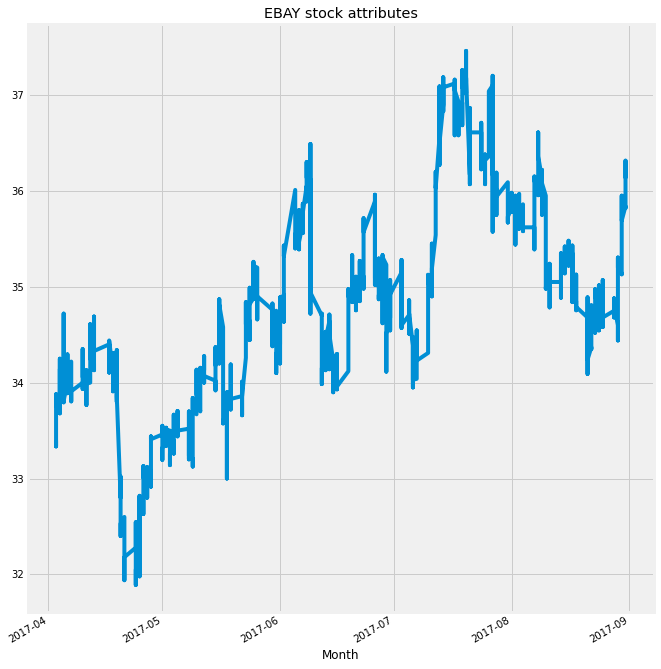

In [118]:
data['NASDAQ.EBAY'].plot(subplots=True, figsize=(10,12))
plt.title('EBAY stock attributes')
plt.savefig('EBAY_stocks.png')
plt.show()


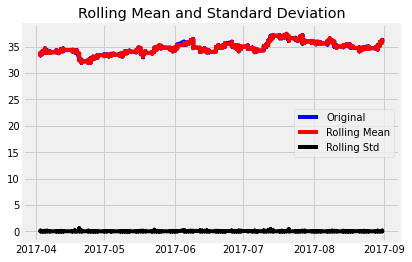

Results of dickey fuller test
Test Statistics                   -2.162959
p-value                            0.219963
No. of lags used                   0.000000
Number of observations used    41265.000000
critical value (1%)               -3.430508
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [119]:
test_stationarity(data['NASDAQ.EBAY'])

In [121]:
#First Difference
EBAY_data = data[['NASDAQ.EBAY']]
EBAY_data.loc[:,'First_Difference'] = EBAY_data['NASDAQ.EBAY'] - EBAY_data['NASDAQ.EBAY'].shift(1)
EBAY_data.head()

c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\leo26\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,NASDAQ.EBAY,First_Difference
Month,,
2017-04-03,33.3975,NaN
2017-04-03,33.3950,-0.0025
2017-04-03,33.4100,0.0150
2017-04-03,33.3350,-0.0750
2017-04-03,33.4000,0.0650


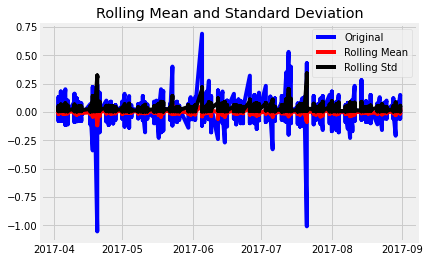

Results of dickey fuller test
Test Statistics                  -30.679619
p-value                            0.000000
No. of lags used                  46.000000
Number of observations used    41218.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [122]:
EBAY_data = EBAY_data.copy()
EBAY_data.dropna(inplace=True)

test_stationarity(EBAY_data['First_Difference'])

#### Test statistic is less than critical value and data has no unit root and it is stationary

### Seasonal Decomposition

c:\users\leo26\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  


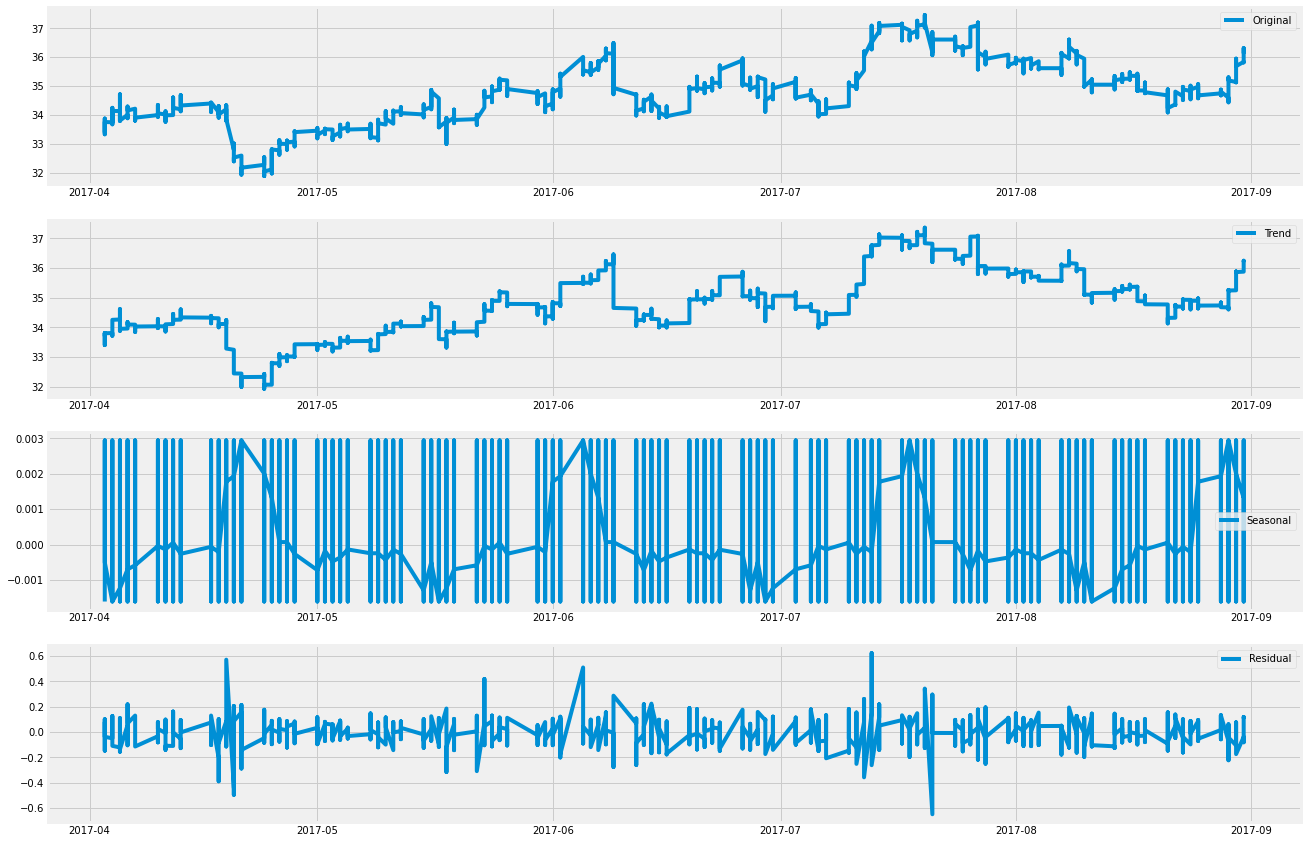

In [123]:
plt.figure(figsize=(20,15))
decomposition = seasonal_decompose(EBAY_data['NASDAQ.EBAY'],freq = 30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(EBAY_data['NASDAQ.EBAY'], label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')

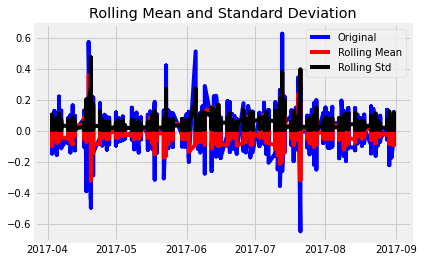

Results of dickey fuller test
Test Statistics                  -41.296136
p-value                            0.000000
No. of lags used                  55.000000
Number of observations used    41179.000000
critical value (1%)               -3.430509
critical value (5%)               -2.861610
critical value (10%)              -2.566807
dtype: float64


In [124]:
log_decompose = residual
log_decompose.dropna(inplace=True)
test_stationarity(log_decompose)

Data is stationary
Test statistic is lower than critical values. The rolling mean and standard deviation have small variations with time.

<Figure size 1440x720 with 0 Axes>

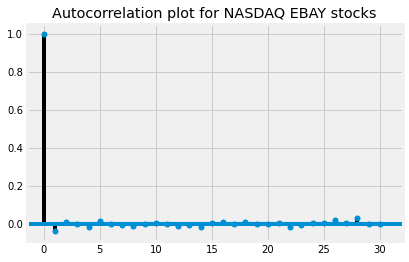

In [125]:
plt.figure(figsize=(20,10))
first_fig = plot_acf(EBAY_data['First_Difference'], lags = 30, title = 'Autocorrelation plot for NASDAQ EBAY stocks')

<Figure size 1440x720 with 0 Axes>

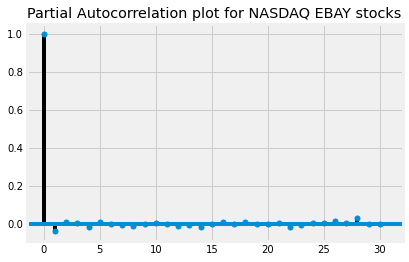

In [126]:
plt.figure(figsize=(20,10))
first_fig_pacf = plot_pacf(EBAY_data['First_Difference'], lags = 30, title = 'Partial Autocorrelation plot for NASDAQ EBAY stocks')

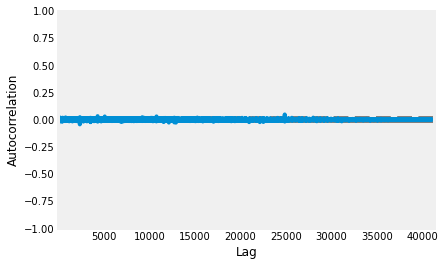

In [127]:
autocorrelation_plot(EBAY_data['First_Difference'])

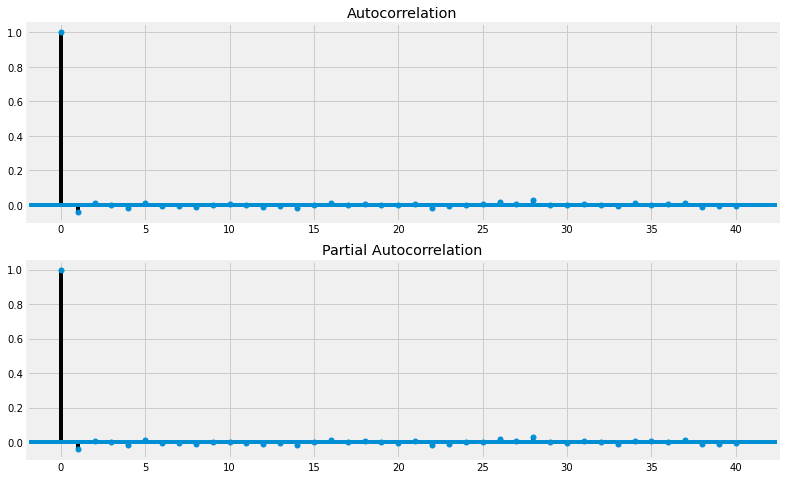

In [128]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(EBAY_data['First_Difference'].iloc[30:], lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(EBAY_data['First_Difference'].iloc[30:],lags = 40, ax = ax2)

In [129]:
lags_acf = acf(EBAY_data['First_Difference'],nlags=80)
lags_pacf = pacf(EBAY_data['First_Difference'],nlags=80)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


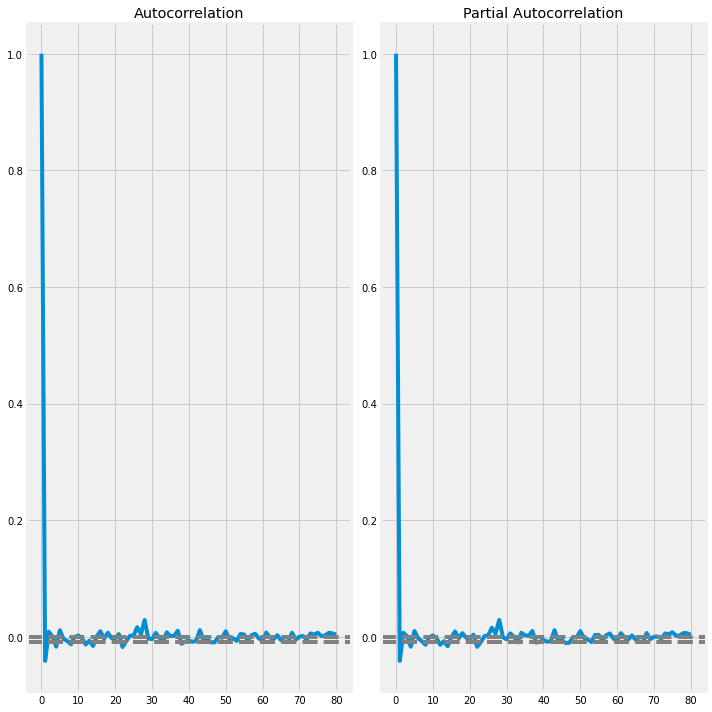

In [130]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.plot(lags_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_data['First_Difference'])), linestyle='--', color='gray')

plt.title("Autocorrelation")

plt.subplot(122)
plt.plot(lags_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_data['First_Difference'])), linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_data['First_Difference'])), linestyle='--', color='gray')
plt.title("Partial Autocorrelation")
plt.tight_layout()

### Seasonal ARIMA model

In [131]:
model = sm.tsa.statespace.SARIMAX(EBAY_data['NASDAQ.EBAY'], order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
results.summary()

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82104.712
Date:                            Tue, 13 Oct 2020   AIC                        -164207.425
Time:                                    11:03:34   BIC                        -164198.797
Sample:                                         0   HQIC                       -164204.698
                                          - 41265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.841      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                    10939.63   Jarque-Bera (JB):          28223015.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                       131.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

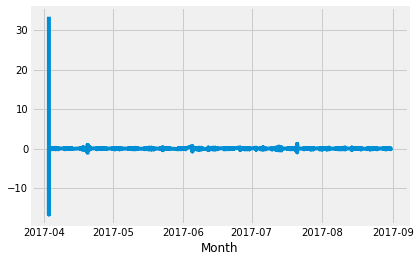

In [132]:
results.resid.plot()

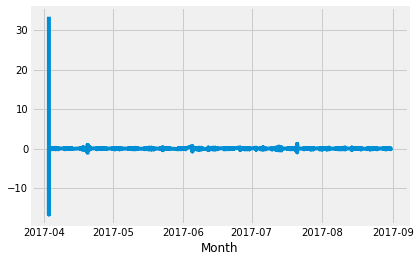

In [133]:
results.resid.plot()

In [134]:
EBAY_data = EBAY_data.copy()
EBAY_data['Forecast'] = results.predict()

EBAY_data.head()

,NASDAQ.EBAY,First_Difference,Forecast
Month,,,
2017-04-03,33.395,-0.0025,0.000
2017-04-03,33.410,0.0150,33.395
2017-04-03,33.335,-0.0750,33.410
2017-04-03,33.400,0.0650,33.335
2017-04-03,33.430,0.0300,33.400


### Prediction of future values

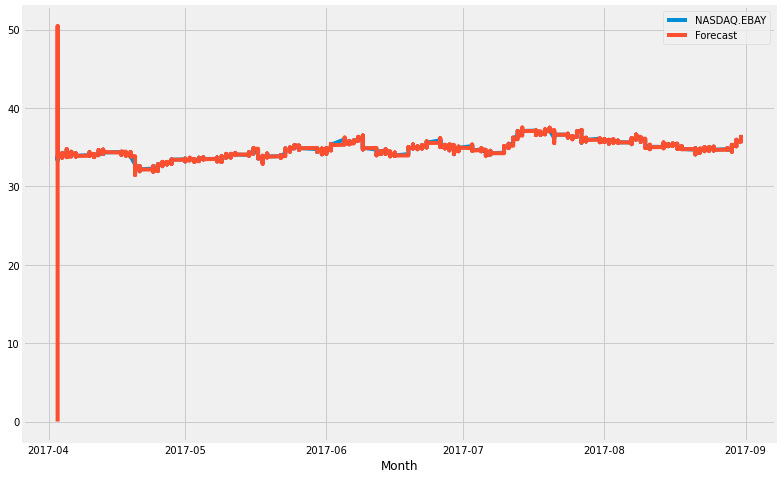

In [135]:
EBAY_data[['NASDAQ.EBAY','Forecast']].plot(figsize=(12,8))

In [136]:
results.forecast(steps=20)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
41275    36.010
41276    36.020
41277    35.980
41278    35.920
41279    35.920
41280    35.910
41281    35.910
41282    35.915
41283    35.910
41284    35.915
dtype: float64

In [137]:
results.predict(start=41264,end=41284)

C:\Users\leo26\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


41264    36.110
41265    36.090
41266    36.030
41267    36.030
41268    36.020
41269    36.020
41270    36.025
41271    36.020
41272    36.025
41273    36.020
41274    36.020
41275    36.010
41276    36.020
41277    35.980
41278    35.920
41279    35.920
41280    35.910
41281    35.910
41282    35.915
41283    35.910
41284    35.915
dtype: float64

In [138]:
#### Accuracy of the forecast using Mean Squared Error

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
print('Mean Squared Error NASDAQ.EBAY: ', mean_squared_error(EBAY_data['NASDAQ.EBAY'],EBAY_data['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY: ', mean_absolute_error(EBAY_data['NASDAQ.EBAY'],EBAY_data['Forecast']))
rmse = math.sqrt(mean_squared_error(EBAY_data['NASDAQ.EBAY'],EBAY_data['Forecast']))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(EBAY_data['Forecast'] - EBAY_data['NASDAQ.EBAY'])/np.abs(EBAY_data['NASDAQ.EBAY']))
print('MAPE: '+str(mape))

Mean Squared Error NASDAQ.EBAY:  0.034835678936292976
Mean Absolute Error NASDAQ.EBAY:  0.021688033467878367
RMSE: 0.186643186150186
MAPE: 0.0006241230763019505
